In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [3]:
#loading training dataset
wine = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#so using the quality index we want to predict whether our alcohol comes in good category or not 
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


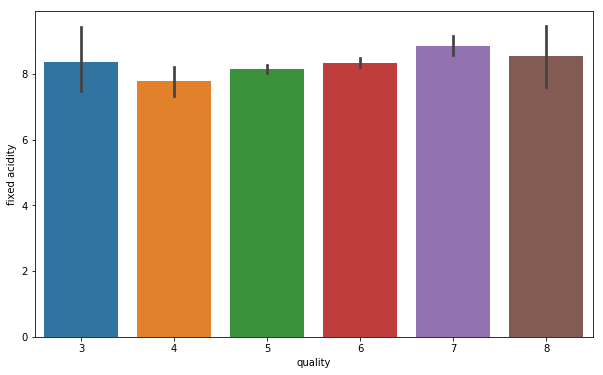

In [6]:
#so we can see that our dataset is quite cleared and is having no null columns 
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data = wine)

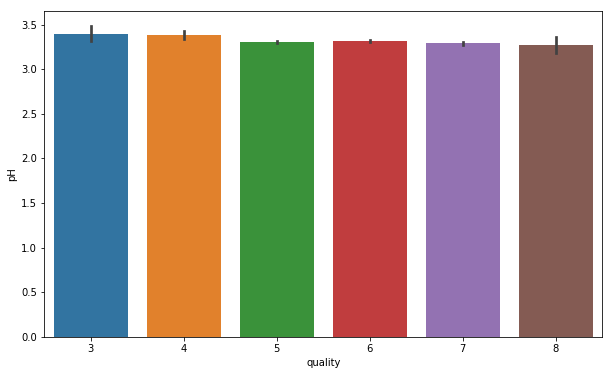

In [8]:
# so we can't see much patterns between the quality and fixed acidity
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='pH',data=wine)

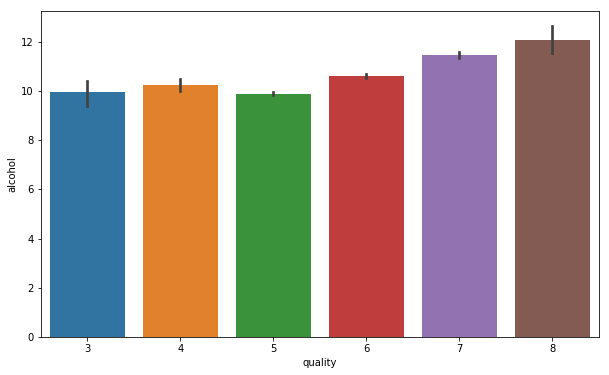

In [9]:
#we can see that quality does not much depend on the pH
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol' ,data=wine )

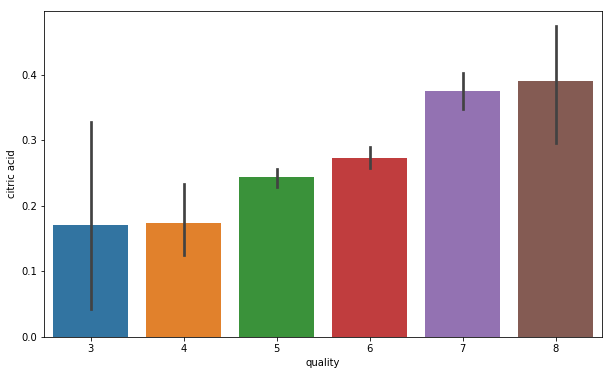

In [10]:
#so we can see that quality is increasing as alcohol content is increasing 
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=wine)

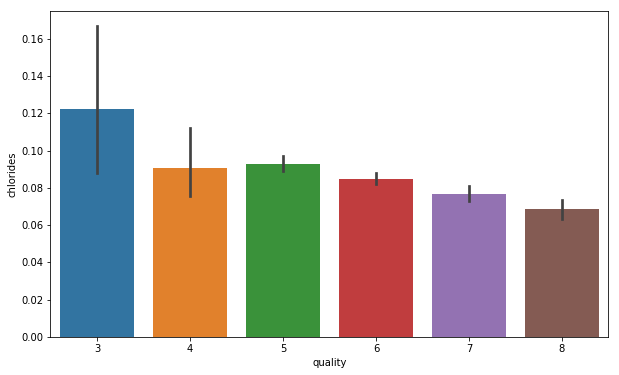

In [11]:
#and quality is increasing rapidly as citric acid content is increasing 
fig = plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=wine)

In [12]:
#as the chlorides content is increasing quality is decreasing 


In [14]:
bins = (2,6.5,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins = bins,labels = group_names)

In [15]:
wine["quality"]

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]

In [17]:
wine["quality"]==6

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality, Length: 1599, dtype: bool

In [18]:
#this cut method is very useful since when wine quality is from 2 to 6.5 that means we are classifiy this as the bad wine and from 6.5 to 8 we are classifiying that as good wine

In [19]:
label_encoder = LabelEncoder()

In [20]:
wine['quality'] = label_encoder.fit_transform(wine["quality"])

In [21]:
wine["quality"]

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

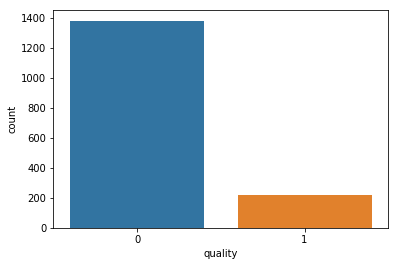

In [22]:
sns.countplot(wine["quality"])

In [23]:
#now we need to seperate our dataset into feature and target columns 
X = wine.drop('quality',axis=1)
y = wine['quality']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       273
           1       0.70      0.30      0.42        47

    accuracy                           0.88       320
   macro avg       0.79      0.64      0.67       320
weighted avg       0.86      0.88      0.86       320



In [30]:
#let's try GridsearchCV method for hyperparameter tuning
svc = SVC()
params = {'C':[0.1,0.8,0.9,1.1,1.2,1.3,1.4] , 'kernel':['linear','rbf'],'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]}

In [31]:
grid_svc = GridSearchCV(svc,param_grid=params,scoring='accuracy',cv=20)

In [32]:
grid_svc.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [33]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [34]:
svc2 = SVC(C=1.2,gamma=0.9,kernel='rbf')

In [35]:
svc2.fit(X_train,y_train)
prediction = svc2.predict(X_test)

In [37]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [ ]:
#and here comes the beautiful accuracy of 90%